In [1]:
import pandas as pd

#import the dataset
columns = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=columns)

Extract features and targets

In [2]:
features = data.iloc[:,1:].values
target = data.iloc[:,0].values

Label encoding the target values

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(target)
target = le.transform(target)

Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Apply dimentionality reduction , PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

#Fit the model with X_train and apply the dimensionality reduction on X_train.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)
print classification_reort(y_predicted,y_test)

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.76      0.86        21
          2       0.17      0.50      0.25         2

avg / total       0.93      0.83      0.87        36



In [19]:
print y_predicted

[0 1 1 0 1 1 0 1 1 1 1 1 0 1 2 1 0 0 1 0 1 0 2 1 1 1 1 1 1 1 0 0 1 0 0 0]


Plot the classification on graph

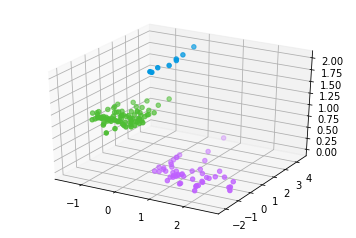

In [53]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

y_predicted = lr.predict(X_train)

colors = []
for cls in y_predicted:
    if cls == 0:
        colors.append('#BF5FFF')
    elif cls == 1:
        colors.append('#4DBD33')
    elif cls == 2:
        colors.append('#0198E1')
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], np.array(y_predicted).astype(float), c=colors)